In [ ]:
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Flatten, GaussianNoise, Input, Reshape
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt


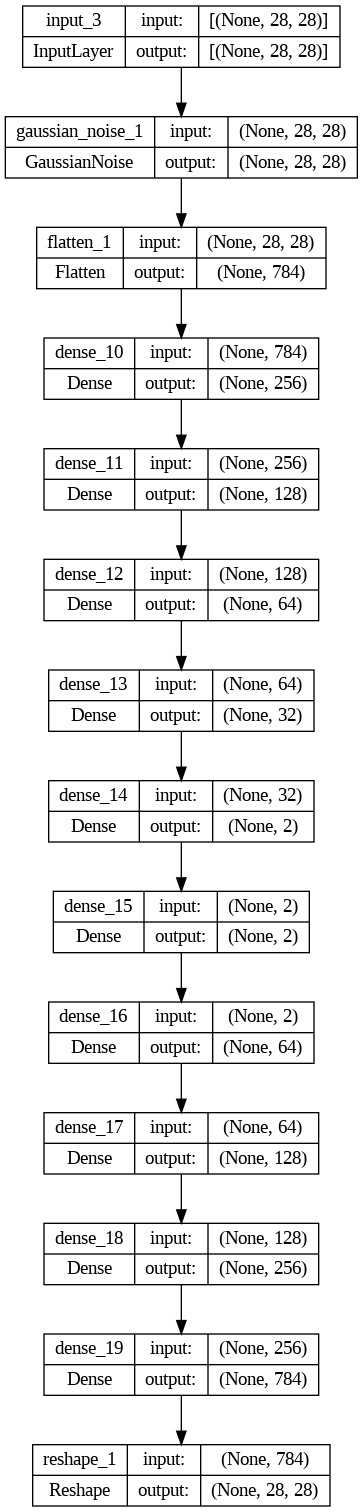

In [ ]:
train, test = fashion_mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]
X_train = X_train/255
X_test = X_test/255

act_func = 'selu'

encoder_layers = [
  GaussianNoise(1),
  Flatten(),
  Dense(256, activation=act_func),
  Dense(128, activation=act_func),
  Dense(64, activation=act_func),
  Dense(32, activation=act_func),
  Dense(2,activation=act_func)  #For clusterization
]
decoder_layers = [
  Dense(2, activation=act_func),  #For clusterization
  Dense(64, activation=act_func),
  Dense(128, activation=act_func),
  Dense(256, activation=act_func),
  Dense(784, activation="sigmoid"),
  Reshape((28,28))
]
lrng_rate = 0.0001

tensor = input_aec = input_encoder = Input(X_train.shape[1:])
for layer in encoder_layers:
  tensor = layer(tensor)
output_encoder = tensor
dec_tensor = input_decoder =Input(output_encoder.shape[1:])
for layer in decoder_layers:
  tensor = layer(tensor)
  dec_tensor = layer(dec_tensor)
output_aec = tensor
output_decoder = dec_tensor
autoencoder = Model(inputs = input_aec,outputs = output_aec)
encoder = Model(inputs = input_encoder,outputs = output_encoder)
decoder = Model(inputs = input_decoder,outputs = dec_tensor)

autoencoder.compile(optimizer=Adam(lrng_rate),loss='binary_crossentropy')
plot_model(autoencoder,show_shapes=True)


Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.5093
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4330
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4291
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4255
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4205
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4169
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4134
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4062
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3995
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3956
Epoch 11/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3934
Epoch 12/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3913
Epoch 13/50
235/235 [====

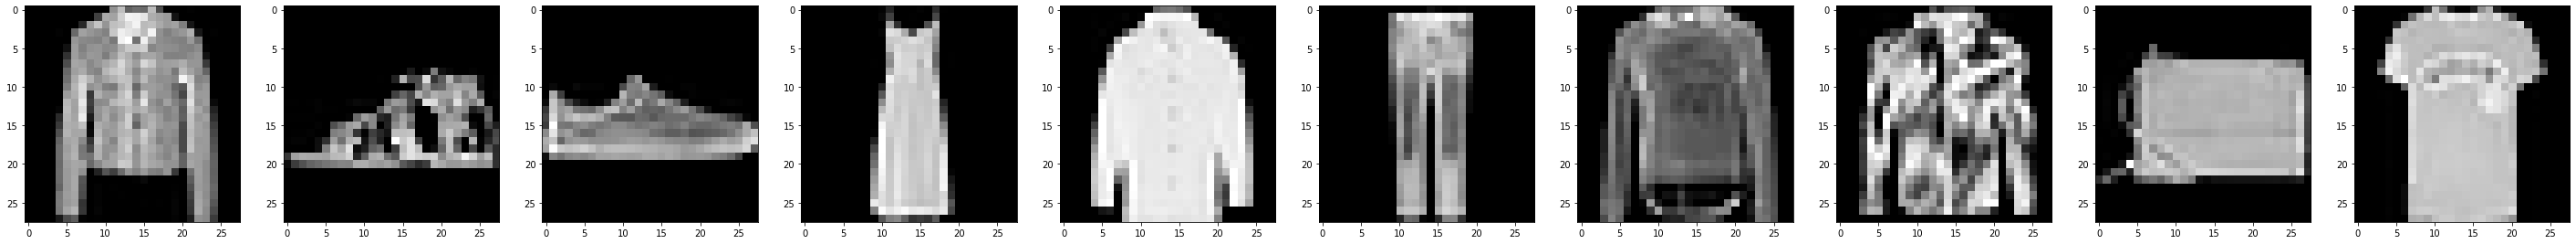

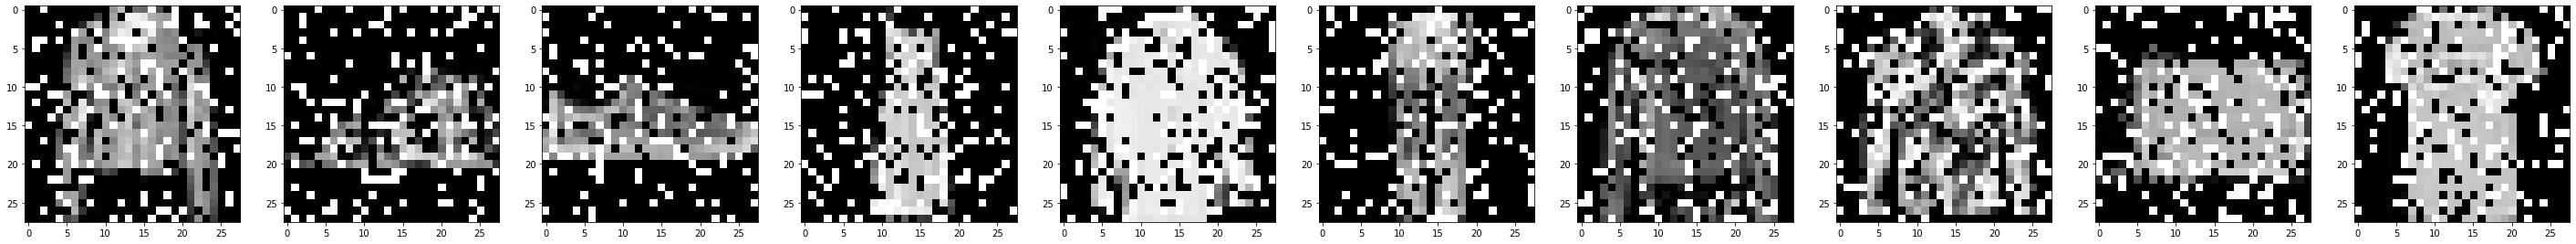

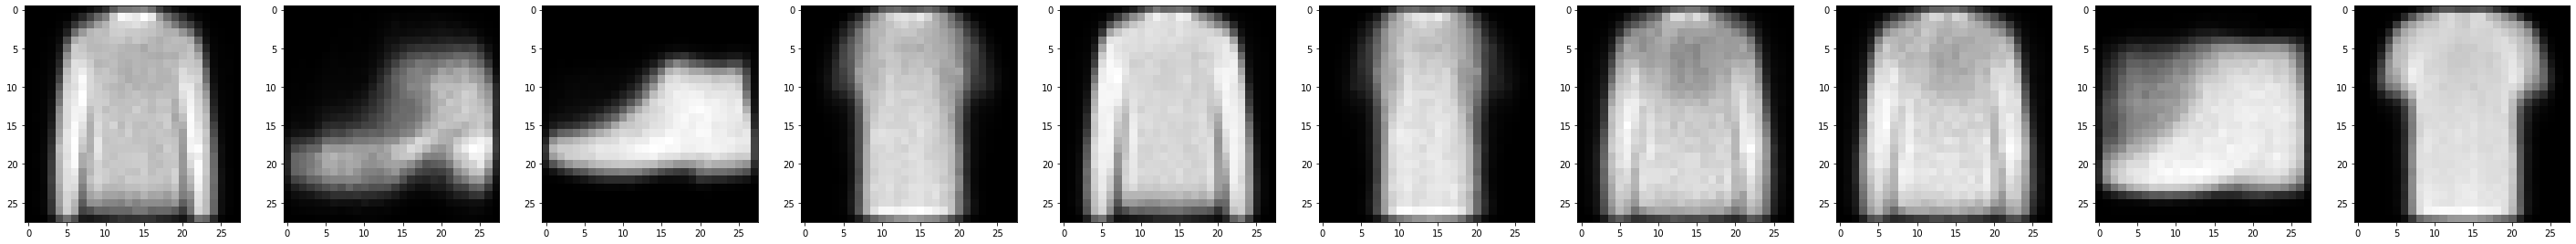

In [ ]:
autoencoder.fit(x = X_train, y = X_train,epochs = 50, batch_size = 256)

def show_pictures(arrs):
  arr_cnt = arrs.shape[0]
  fig, axes = plt.subplots(1, arr_cnt,figsize=(5*arr_cnt, arr_cnt))
  for axis, pic in zip(axes, arrs):
    axis.imshow(pic.squeeze(), cmap = 'gray')

test_photos = X_test[10:20,...].copy()
mask = np.random.randn(*test_photos.shape)
white = mask > 1
black = mask < -1
noisy_test_photos=test_photos.copy()
noisy_test_photos[white] = 1
noisy_test_photos[black] = 0

cleaned_images=autoencoder.predict(noisy_test_photos)
show_pictures(test_photos)
show_pictures(noisy_test_photos)
show_pictures(cleaned_images)

1/1 [==============================] - 0s 13ms/step


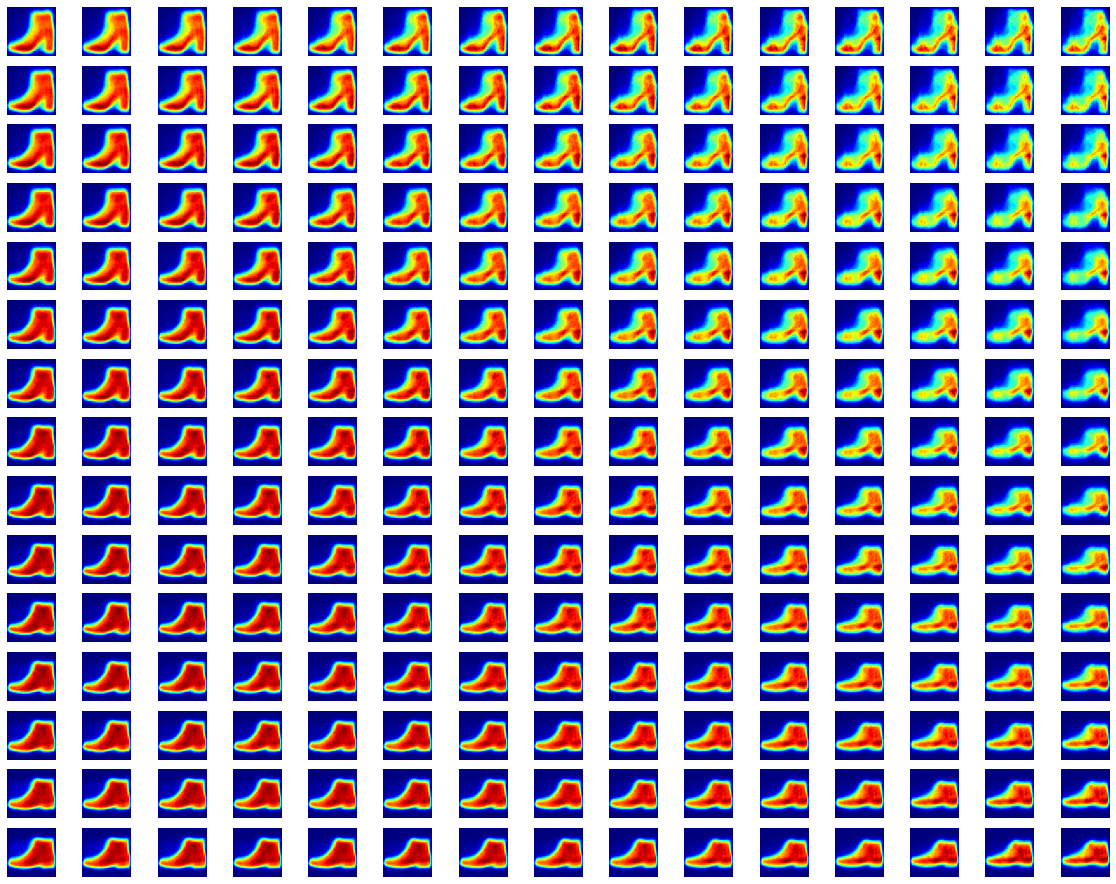

In [ ]:
num = 15
limit = 0.6
step = limit*2/num
fig, ax = plt.subplots(num, num, figsize = (20,16))
X_vals = np.arange(-limit, limit, step)
Y_vals = np.arange(-limit, limit, step)
for i, x in enumerate(X_vals):
  for j, y in enumerate(Y_vals):
    test_in = np.array([[x,y]])
    output = decoder.predict(x=test_in)
    output = np.squeeze(output)
    ax[-j-1,i].imshow(output, cmap = 'jet')
    ax[-j-1,i].axis('off')

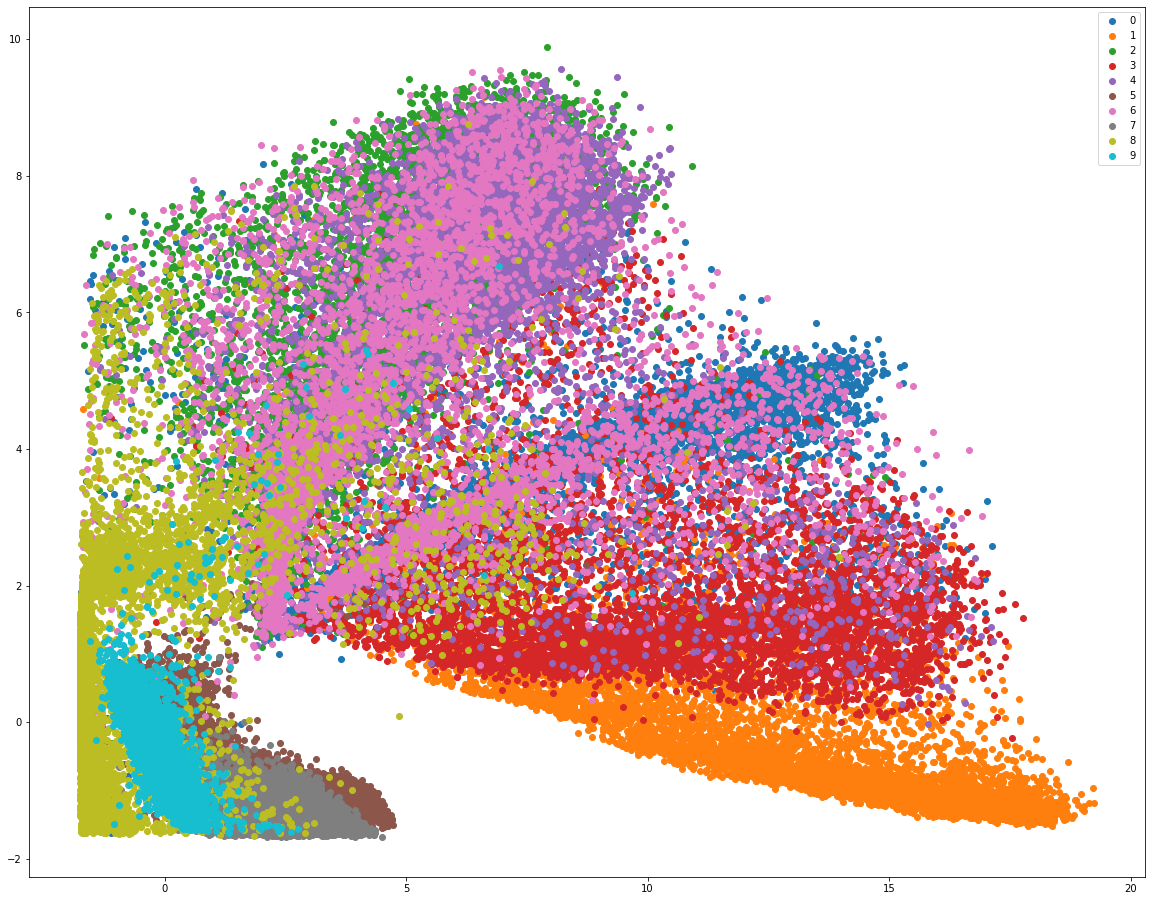

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20,16))
for i in range(10):
  digits = y_train == i
  needed_imgs = X_train[digits,...]
  preds = encoder.predict(needed_imgs, verbose=0)
  ax.scatter(preds[:,0], preds[:,1])
ax.legend(list(range(10)))